In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.time import Time

### bsc fluxerr

In [2]:
bsc = pd.read_csv('./CentralDogma/1_Limbo_/akari_bsc.csv')

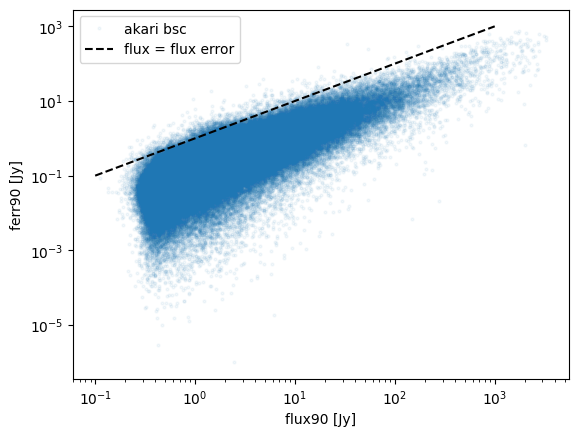

In [5]:
fig, ax = plt.subplots()

ax.plot(bsc['flux90'], bsc['ferr90'], 'o', markersize=2, label='akari bsc', alpha=0.05, linewidth=0)
ax.plot([0.1, 1000], [0.1, 1000], 'k--', label='flux = flux error')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('flux90 [Jy]')
ax.set_ylabel('ferr90 [Jy]')

ax.legend()

plt.show()

### akari scan flux

In [90]:
def read_data_file2(file):
    
    with open(file, 'r') as f:
        lines = f.readlines()
    data = []
    time = []
    
    for line in lines:
        if line[0] != '#':
            line = line.strip()
            # print(line.split('   ')[-2:])
            data.append([float(x) for x in line.split('   ')[-2:]])
            
            # line.split(' ')[2].replace('/', '-'): replace / with - to make it iso format
            t = Time(line.split(' ')[2].replace('/', '-')+' '+line.split(' ')[3], format='iso', scale='utc')
            time.append(t.mjd)
    # make data a pd.DataFrame
    data = pd.DataFrame(data)
    data.columns = ['fpeak', 'fgfit']
    return data, time

def flux_ratio(data):
    
    data = data.loc[data['fpeak'] > 0] 
    
    # Reset the index
    data = data.reset_index(drop=True)
    
    R = []
    
    for i in range(len(data)-1):
        for j in range(i+1, len(data)):
            
            r = data['fpeak'][i] / data['fpeak'][j]
            
            if r > 1:
                R.append(r)
            else:
                R.append(1/r)
                
    return pd.DataFrame(R)

def flux_ratio_95(data):
    
    # flux_ratio(data[:28]).sort_values(by=0, ascending=True)[0].reset_index(drop=True)[int(0.95*len(flux_ratio(data[:28])))]
    
    return data.quantile(0.95)

data, time = read_data_file2('./CentralDogma/4_Greed_/tsl_brightsources_flux.txt')

candidate_ratio = [
    2.44/0.42, 1.19/0.3, 1.28/0.24, 1.85/0.25, 1.92/0.24, 0.78/0.3, 0.96/0.33, 1.08/0.33, 1.85/0.37, 1.76/0.18, 1.75/0.55
]

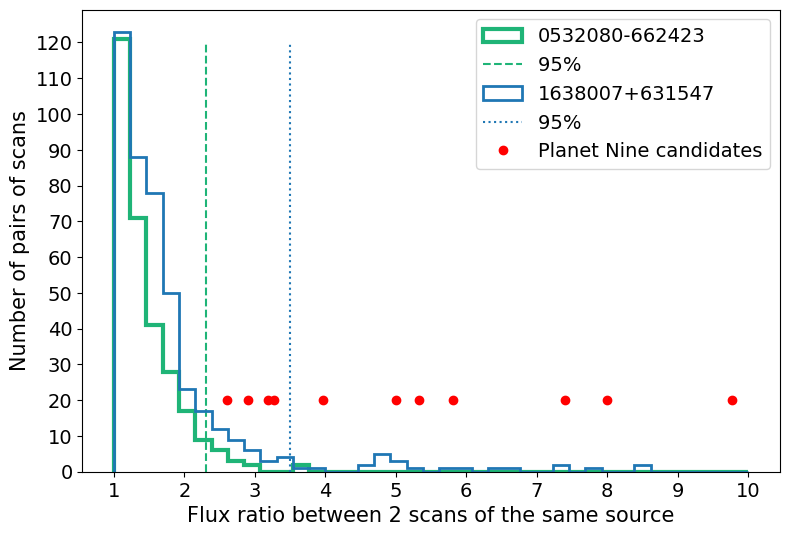

In [110]:
fig, ax = plt.subplots(figsize=(9, 6))

x_bin = np.linspace(1, 10, 40)

ax.hist(flux_ratio(data[:28]), bins=x_bin, histtype='step', color='#1fb477',
        linewidth=3, label='0532080-662423')
ax.plot([flux_ratio_95(flux_ratio(data[:28])), flux_ratio_95(flux_ratio(data[:28]))], [0, 120], '--', color='#1fb477', label='95% ')

ax.hist(flux_ratio(data[28:]), bins=x_bin, histtype='step', color='#1f77b4',
        linewidth=2, label='1638007+631547')
ax.plot([flux_ratio_95(flux_ratio(data[28:])), flux_ratio_95(flux_ratio(data[28:]))], [0, 120], ':', color='#1f77b4', label='95% ')

ax.plot(candidate_ratio, [20]*len(candidate_ratio), 'o', color='r', label='Planet Nine candidates')
# ax.hist(candidate_ratio, bins=x_bin, histtype='step', color='r',)

ax.set_xticks(np.arange(1, 11, 1))
ax.set_yticks(np.arange(0, 121, 10))
ax.set_xlabel('Flux ratio between 2 scans of the same source', fontsize=15)
ax.set_ylabel('Number of pairs of scans', fontsize=15)
ax.tick_params(axis='both', labelsize=14)

ax.legend(fontsize=14)

plt.show()


In [59]:
ax.hist(flux_ratio(data[:28]), bins=x_bin, histtype='step', color='#1fb477',
        linewidth=2, label='0532080-662423')

(array([121.,  71.,  41.,  28.,  17.,   9.,   6.,   3.,   2.,   0.,   0.,
          2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.]),
 array([ 1.        ,  1.23076923,  1.46153846,  1.69230769,  1.92307692,
         2.15384615,  2.38461538,  2.61538462,  2.84615385,  3.07692308,
         3.30769231,  3.53846154,  3.76923077,  4.        ,  4.23076923,
         4.46153846,  4.69230769,  4.92307692,  5.15384615,  5.38461538,
         5.61538462,  5.84615385,  6.07692308,  6.30769231,  6.53846154,
         6.76923077,  7.        ,  7.23076923,  7.46153846,  7.69230769,
         7.92307692,  8.15384615,  8.38461538,  8.61538462,  8.84615385,
         9.07692308,  9.30769231,  9.53846154,  9.76923077, 10.        ]),
 [<matplotlib.patches.Polygon at 0x7f362d79a6c0>])

#### flux fluctuation

Text(0.5, 0.98, 'Flux fluctuation of 0532080-662423')

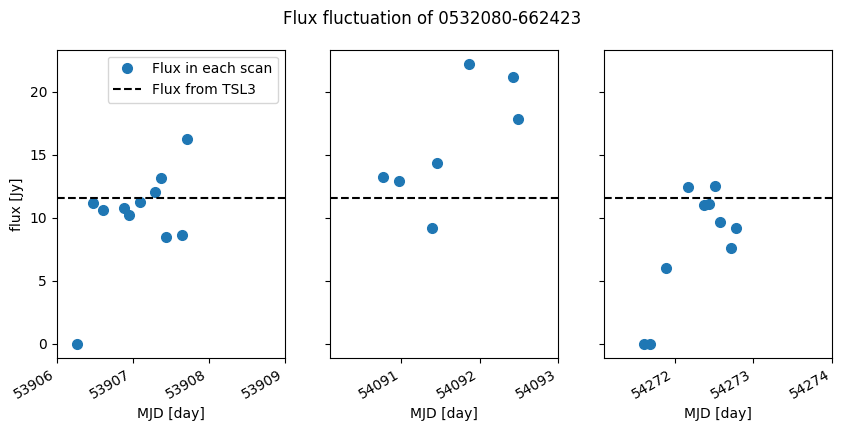

In [42]:
fig, axs = plt.subplots(1, 3, figsize=(10, 4))

x = [time[:28], time[28:]] # use time instead of scan number to plot flux vs

xlimit = [(53906, 53909), (54090+0.1, 54093), (54271+0.1, 54274)]

for i in range(3):
        ax = axs[i]
        ax.plot(x[0], data['fpeak'][:28], 'o',
                markersize=7, label='Flux in each scan', linewidth=0)

        # ax.plot(x[0], data['fgfit'][:28], 'o',
        #         markersize=7, label='fgfit', linewidth=0)

        ax.plot(xlimit[i], [11.53, 11.53], 'k--', label='Flux from TSL3')

        ax.set_xlim(xlimit[i])
        ax.set_xlabel('MJD [day]')
        ax.ticklabel_format(useOffset=False)
        
        # set x ticks integer and tilt 30 degree
        ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
        plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
        
        if i == 0:
                ax.set_ylabel('flux [Jy]')
                ax.legend()
        else:
                ax.set_yticklabels([])

plt.suptitle('Flux fluctuation of 0532080-662423')

Text(0.5, 0.98, 'Flux fluctuation of 1638007+631547')

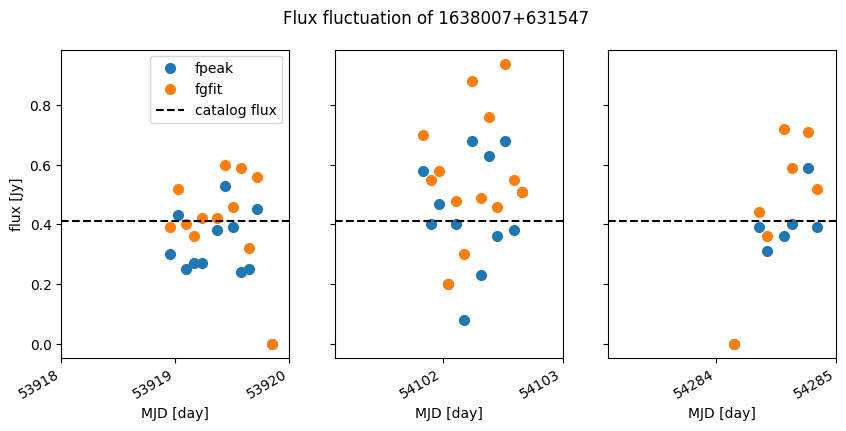

In [36]:
fig, axs = plt.subplots(1, 3, figsize=(10, 4))

x = [time[:28], time[28:]] # use time instead of scan number to plot flux vs

xlimit = [(53918, 53920), (54101+0.1, 54103), (54283+0.1, 54285)]

for i in range(3):
        ax = axs[i]
        ax.plot(x[1], data['fpeak'][28:], 'o',
                markersize=7, label='fpeak', linewidth=0)

        ax.plot(x[1], data['fgfit'][28:], 'o',
                markersize=7, label='fgfit', linewidth=0)

        ax.plot(xlimit[i], [0.41, 0.41], 'k--', label='catalog flux')

        ax.set_xlim(xlimit[i])
        ax.set_xlabel('MJD [day]')
        ax.ticklabel_format(useOffset=False)
        
        # set x ticks integer and tilt 30 degree
        ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
        plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
        
        if i == 0:
                ax.set_ylabel('flux [Jy]')
                ax.legend()
        else:
                ax.set_yticklabels([])

plt.suptitle('Flux fluctuation of 1638007+631547')

Text(0.5, 0, 'scan number/number of sources')

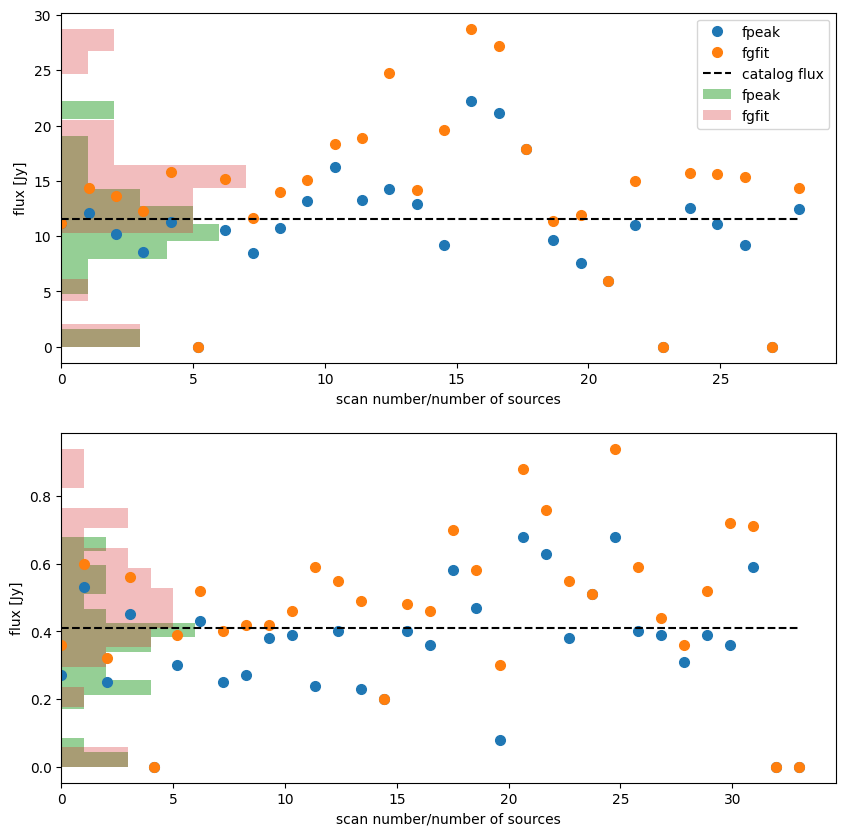

In [24]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

x = [np.linspace(0, 28, 28), np.linspace(0, 33, 33)]
# x = [time[:28], time[28:]] # use time instead of scan number to plot flux vs

# bax1 = brokenaxes(xlims=((53900, 53910), (54070, 54090), (54250, 54260)))

ax = axs[0]
ax.plot(x[0], data['fpeak'][:28], 'o',
        markersize=7, label='fpeak', linewidth=0)

ax.plot(x[0], data['fgfit'][:28], 'o',
        markersize=7, label='fgfit', linewidth=0)

# plot with brokenaxes
bax1.plot(x[0], data['fpeak'][:28], 'o',
        markersize=7, label='fpeak', linewidth=0)


ax.plot([0, 28], [11.53, 11.53], 'k--', label='catalog flux')

ax.hist(data['fpeak'][:28], bins=14, orientation="horizontal",  alpha=0.5, label='fpeak')
ax.hist(data['fgfit'][:28], bins=14, orientation="horizontal",  alpha=0.3, label='fgfit')

ax.set_ylabel('flux [Jy]')
ax.set_xlabel('scan number/number of sources')
ax.legend()

ax = axs[1]
ax.plot(x[1], data['fpeak'][28:], 'o',
        markersize=7, label='fpeak', linewidth=0)

ax.plot(x[1], data['fgfit'][28:], 'o',
        markersize=7, label='fgfit', linewidth=0)

ax.plot([0, 33], [0.41, 0.41], 'k--', label='catalog flux')

ax.hist(data['fpeak'][28:], bins=16, orientation="horizontal",  alpha=0.5, label='fpeak')
ax.hist(data['fgfit'][28:], bins=16, orientation="horizontal",  alpha=0.3, label='fgfit')

ax.set_ylabel('flux [Jy]')
ax.set_xlabel('scan number/number of sources')
